In [1]:
import pypokedex
import requests
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


## Pokemon Details and Evolution Chains

In [2]:
# URL for GET requests to retrieve pokemon data
base_url = "https://pokeapi.co/api/v2/pokemon/"
print(base_url)

https://pokeapi.co/api/v2/pokemon/


In [3]:
# Create a url with a specific character id
limit = '?limit=1302'
url = base_url + limit
print(url)

https://pokeapi.co/api/v2/pokemon/?limit=1302


In [4]:
# Perform a get request for this character
response = requests.get(url)
print(response.url)

https://pokeapi.co/api/v2/pokemon/?limit=1302


In [5]:
# storing json response within a variable
pokedata = response.json()
# using json.dumps to print the json
print(json.dumps(pokedata, indent=4, sort_keys=True))

{
    "count": 1302,
    "next": null,
    "previous": null,
    "results": [
        {
            "name": "bulbasaur",
            "url": "https://pokeapi.co/api/v2/pokemon/1/"
        },
        {
            "name": "ivysaur",
            "url": "https://pokeapi.co/api/v2/pokemon/2/"
        },
        {
            "name": "venusaur",
            "url": "https://pokeapi.co/api/v2/pokemon/3/"
        },
        {
            "name": "charmander",
            "url": "https://pokeapi.co/api/v2/pokemon/4/"
        },
        {
            "name": "charmeleon",
            "url": "https://pokeapi.co/api/v2/pokemon/5/"
        },
        {
            "name": "charizard",
            "url": "https://pokeapi.co/api/v2/pokemon/6/"
        },
        {
            "name": "squirtle",
            "url": "https://pokeapi.co/api/v2/pokemon/7/"
        },
        {
            "name": "wartortle",
            "url": "https://pokeapi.co/api/v2/pokemon/8/"
        },
        {
            "name"

In [6]:
# Getting length of results of json
pokedata_length = len(pokedata["results"])
print(pokedata_length)

1302


In [7]:
# Checking results content
pokedata_results = pokedata["results"]
pokedata_results

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
 {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
 {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
 {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
 {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
 {'name': '

In [8]:
# Creating empty lists to store names and ids
poke_names = []
poke_ids = []

# Creating for loop to get pokemon name and then ID from the urls
for data in pokedata_results:
    poke_name = data['name']
    poke_id = re.search(r'/(\d+)/$', data['url']).group(1)
    
    poke_names.append(poke_name)
    poke_ids.append(poke_id)

# Creating a dictionary from the lists
data_dict = {
    'Pokemon ID': poke_ids,
    'Pokemon Name': poke_names
}

# Creating a Pandas DataFrame from the dictionary
pokemon_df = pd.DataFrame(data_dict)

# Printing the DataFrame
pokemon_df

Pokemon ID              Pokemon Name
0             1                 bulbasaur
1             2                   ivysaur
2             3                  venusaur
3             4                charmander
4             5                charmeleon
...         ...                       ...
1297      10273   ogerpon-wellspring-mask
1298      10274  ogerpon-hearthflame-mask
1299      10275  ogerpon-cornerstone-mask
1300      10276        terapagos-terastal
1301      10277         terapagos-stellar

[1302 rows x 2 columns]

In [9]:
# Creating more lists for more data
types = []
base_stat = []

# Changing to int
pokemon_df['Pokemon ID'] = pokemon_df['Pokemon ID'].astype(int)

In [10]:
# Checking dataframe
pokemon_more_info_df = pokemon_df.copy()
pokemon_more_info_df

Pokemon ID              Pokemon Name
0              1                 bulbasaur
1              2                   ivysaur
2              3                  venusaur
3              4                charmander
4              5                charmeleon
...          ...                       ...
1297       10273   ogerpon-wellspring-mask
1298       10274  ogerpon-hearthflame-mask
1299       10275  ogerpon-cornerstone-mask
1300       10276        terapagos-terastal
1301       10277         terapagos-stellar

[1302 rows x 2 columns]

In [11]:
# Creating for loop to append types and data to dataframe
for id in pokemon_df['Pokemon ID']:
    p = pypokedex.get(dex=id) 
    name = p.name
    type_data = p.types
    stat_data = p.base_stats
  
    types.append(type_data)
    base_stat.append(stat_data)

In [12]:
# Creating new columns and filling with data from pypokedex
pokemon_more_info_df['Pokemon Types'] = types
pokemon_more_info_df['Pokemon Base Stats'] = base_stat

In [13]:
# Converting the separate lists into strings to later split into separate columns
pokemon_more_info_df['Pokemon Types'] = pokemon_more_info_df['Pokemon Types'].map(lambda x : ",".join(x))
pokemon_more_info_df['Pokemon Types'].str.split(", ", expand = True)
pokemon_more_info_df

Pokemon ID              Pokemon Name Pokemon Types  \
0              1                 bulbasaur  grass,poison   
1              2                   ivysaur  grass,poison   
2              3                  venusaur  grass,poison   
3              4                charmander          fire   
4              5                charmeleon          fire   
...          ...                       ...           ...   
1297       10273   ogerpon-wellspring-mask   grass,water   
1298       10274  ogerpon-hearthflame-mask    grass,fire   
1299       10275  ogerpon-cornerstone-mask    grass,rock   
1300       10276        terapagos-terastal        normal   
1301       10277         terapagos-stellar        normal   

               Pokemon Base Stats  
0        (45, 49, 49, 65, 65, 45)  
1        (60, 62, 63, 80, 80, 60)  
2      (80, 82, 83, 100, 100, 80)  
3        (39, 52, 43, 60, 50, 65)  
4        (58, 64, 58, 80, 65, 80)  
...                           ...  
1297   (80, 120, 84, 60, 96, 110)  
1298   (80, 120, 84, 60, 96, 110)  
1299   (80, 120, 84, 60, 96, 110)  
1300  (95, 95, 110, 105, 110, 85)  
1301  (95, 95, 110, 105, 110, 85)  

[1302 rows x 4 columns]

In [14]:
# Creating copy of df
pokemon_clean_df = pokemon_more_info_df.copy()

In [15]:
# Ensuring column is a string to split it later
pokemon_clean_df['Pokemon Base Stats'] = pokemon_clean_df['Pokemon Base Stats'].astype(str)

pokemon_clean_df.dtypes

Pokemon ID             int32
Pokemon Name          object
Pokemon Types         object
Pokemon Base Stats    object
dtype: object

In [16]:
# Cleaning the 'Pokemon Base Stats' column
pokemon_clean_df['Pokemon Base Stats'] = pokemon_clean_df['Pokemon Base Stats'].str.replace(r'[\(\)]', '', regex=True)

# Splitting base stats into separate columns
base_stats_df = pokemon_clean_df['Pokemon Base Stats'].str.split(', ', expand=True)
base_stats_df.columns = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']

# Splitting types into separate columns
pokemon_clean_df['Type1'] = pokemon_clean_df['Pokemon Types'].str.split(',').str[0]
pokemon_clean_df['Type2'] = pokemon_clean_df['Pokemon Types'].str.split(',').str[1].fillna('')

# Combining the DataFrame with base stats
pokemon_new_df = pd.concat([pokemon_clean_df, base_stats_df], axis=1)

# Dropping the original combined columns
pokemon_new_df = pokemon_new_df.drop(columns=['Pokemon Base Stats', 'Pokemon Types'])

# Displaying DataFrame
pokemon_new_df.head()

Pokemon ID Pokemon Name  Type1   Type2         Base HP Base Attack  \
0           1    bulbasaur  grass  poison  BaseStatshp=45   attack=49   
1           2      ivysaur  grass  poison  BaseStatshp=60   attack=62   
2           3     venusaur  grass  poison  BaseStatshp=80   attack=82   
3           4   charmander   fire          BaseStatshp=39   attack=52   
4           5   charmeleon   fire          BaseStatshp=58   attack=64   

  Base Defense Base Special Attack Base Special Defense Base Speed  
0   defense=49           sp_atk=65            sp_def=65   speed=45  
1   defense=63           sp_atk=80            sp_def=80   speed=60  
2   defense=83          sp_atk=100           sp_def=100   speed=80  
3   defense=43           sp_atk=60            sp_def=50   speed=65  
4   defense=58           sp_atk=80            sp_def=65   speed=80

In [17]:
# Creating function to extract number from each base stat cell to only input number into columns
def extract_number(stat_str):
    return int(re.search(r'\d+', stat_str).group())

# Applying the function to each base stat column
base_stat_columns = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']
for col in base_stat_columns:
    pokemon_new_df[col] = pokemon_new_df[col].apply(extract_number)

In [18]:
# Display the cleaned DataFrame
pokemon_new_df.head()

Pokemon ID Pokemon Name  Type1   Type2  Base HP  Base Attack  Base Defense  \
0           1    bulbasaur  grass  poison       45           49            49   
1           2      ivysaur  grass  poison       60           62            63   
2           3     venusaur  grass  poison       80           82            83   
3           4   charmander   fire               39           52            43   
4           5   charmeleon   fire               58           64            58   

   Base Special Attack  Base Special Defense  Base Speed  
0                   65                    65          45  
1                   80                    80          60  
2                  100                   100          80  
3                   60                    50          65  
4                   80                    65          80

In [19]:
# URL for GET requests to retrieve pokemon evolution data
chain_url = "https://pokeapi.co/api/v2/evolution-chain/"
print(chain_url)

https://pokeapi.co/api/v2/evolution-chain/


In [20]:
ev_str = "?limit=541"
url = chain_url + ev_str

In [21]:
# Performing get request
ev_response = requests.get(url)
print(ev_response.url)

https://pokeapi.co/api/v2/evolution-chain/?limit=541


In [22]:
# storing json response within a variable
ev_chain = ev_response.json()
# using json.dumps to print the json
print(json.dumps(ev_chain, indent=4, sort_keys=True))

{
    "count": 541,
    "next": null,
    "previous": null,
    "results": [
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/1/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/2/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/3/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/4/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/5/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/6/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/7/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/8/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/9/"
        },
        {
            "url": "https://pokeapi.co/api/v2/evolution-chain/10/"
        },
        {
            "url": "https://pokeapi.co/api

In [23]:
# Checking results and grabbing only the urls
ev_results = [chain['url'] for chain in ev_chain['results']]
ev_results

['https://pokeapi.co/api/v2/evolution-chain/1/',
 'https://pokeapi.co/api/v2/evolution-chain/2/',
 'https://pokeapi.co/api/v2/evolution-chain/3/',
 'https://pokeapi.co/api/v2/evolution-chain/4/',
 'https://pokeapi.co/api/v2/evolution-chain/5/',
 'https://pokeapi.co/api/v2/evolution-chain/6/',
 'https://pokeapi.co/api/v2/evolution-chain/7/',
 'https://pokeapi.co/api/v2/evolution-chain/8/',
 'https://pokeapi.co/api/v2/evolution-chain/9/',
 'https://pokeapi.co/api/v2/evolution-chain/10/',
 'https://pokeapi.co/api/v2/evolution-chain/11/',
 'https://pokeapi.co/api/v2/evolution-chain/12/',
 'https://pokeapi.co/api/v2/evolution-chain/13/',
 'https://pokeapi.co/api/v2/evolution-chain/14/',
 'https://pokeapi.co/api/v2/evolution-chain/15/',
 'https://pokeapi.co/api/v2/evolution-chain/16/',
 'https://pokeapi.co/api/v2/evolution-chain/17/',
 'https://pokeapi.co/api/v2/evolution-chain/18/',
 'https://pokeapi.co/api/v2/evolution-chain/19/',
 'https://pokeapi.co/api/v2/evolution-chain/20/',
 'https:/

In [24]:
# Creating copy of pokemon_new_df for later evolutions dataframe
pokemon_ev_df = pokemon_new_df.copy()
pokemon_ev_df.head()

Pokemon ID Pokemon Name  Type1   Type2  Base HP  Base Attack  Base Defense  \
0           1    bulbasaur  grass  poison       45           49            49   
1           2      ivysaur  grass  poison       60           62            63   
2           3     venusaur  grass  poison       80           82            83   
3           4   charmander   fire               39           52            43   
4           5   charmeleon   fire               58           64            58   

   Base Special Attack  Base Special Defense  Base Speed  
0                   65                    65          45  
1                   80                    80          60  
2                  100                   100          80  
3                   60                    50          65  
4                   80                    65          80

In [25]:
grouped_pokenames = []
# Fetching detailed data from each URL and extract Pokémon names
def thru_chain(chain, current_group):
    # Extract the Pokémon name
    current_group.append(chain['species']['name'])
    
    # Go through each evolution chain
    for evo in chain['evolves_to']:
        thru_chain(evo, current_group)

for url in ev_results:
    evo_response = requests.get(url)
    evo_chain = evo_response.json()['chain']
    
    # Start from root of the chain to end
    chain_group = []
    thru_chain(evo_chain, chain_group)
    
    # Append current evolution chain's grouped names to main list
    grouped_pokenames.append(chain_group)


In [26]:
# Mapping from Pokémon names to evolution chain numbers
evolution_chain_map = {}
for chain_no, chain in enumerate(grouped_pokenames, start=1):
    for stage_no, pokemon in enumerate(chain, start=1):
        evolution_chain_map[pokemon] = chain_no

# Function to get the evolution chain number for a Pokemon
def get_evolution_chain_no(pokemon_name):
    return evolution_chain_map.get(pokemon_name, None)

# Making Evolution Chain column
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Pokemon Name'].apply(get_evolution_chain_no)

# Filling NA values in case any Pokemon does not have an evolution chain number
pokemon_ev_df['Evolution Chain'].fillna(value='None', inplace=True)

# Display the updated DataFrame
pokemon_ev_df.head(25)

C:\Users\ashca\AppData\Local\Temp\ipykernel_33000\3959960206.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pokemon_ev_df['Evolution Chain'].fillna(value='None', inplace=True)


Pokemon ID Pokemon Name     Type1   Type2  Base HP  Base Attack  \
0            1    bulbasaur     grass  poison       45           49   
1            2      ivysaur     grass  poison       60           62   
2            3     venusaur     grass  poison       80           82   
3            4   charmander      fire               39           52   
4            5   charmeleon      fire               58           64   
5            6    charizard      fire  flying       78           84   
6            7     squirtle     water               44           48   
7            8    wartortle     water               59           63   
8            9    blastoise     water               79           83   
9           10     caterpie       bug               45           30   
10          11      metapod       bug               50           20   
11          12   butterfree       bug  flying       60           45   
12          13       weedle       bug  poison       40           35   
13          14       kakuna       bug  poison       45           25   
14          15     beedrill       bug  poison       65           90   
15          16       pidgey    normal  flying       40           45   
16          17    pidgeotto    normal  flying       63           60   
17          18      pidgeot    normal  flying       83           80   
18          19      rattata    normal               30           56   
19          20     raticate    normal               55           81   
20          21      spearow    normal  flying       40           60   
21          22       fearow    normal  flying       65           90   
22          23        ekans    poison               35           60   
23          24        arbok    poison               60           95   
24          25      pikachu  electric               35           55   

    Base Defense  Base Special Attack  Base Special Defense  Base Speed  \
0             49                   65                    65          45   
1             63                   80                    80          60   
2             83                  100                   100          80   
3             43                   60                    50          65   
4             58                   80                    65          80   
5             78                  109                    85         100   
6             65                   50                    64          43   
7             80                   65                    80          58   
8            100                   85                   105          78   
9             35                   20                    20          45   
10            55                   25                    25          30   
11            50                   90                    80          70   
12            30                   20                    20          50   
13            50                   25                    25          35   
14            40                   45                    80          75   
15            40                   35                    35          56   
16            55                   50                    50          71   
17            75                   70                    70         101   
18            35                   25                    35          72   
19            60                   50                    70          97   
20            30                   31                    31          70   
21            65                   61                    61         100   
22            44                   40                    54          55   
23            69                   65                    79          80   
24            40                   50                    50          90   

   Evolution Chain  
0              1.0  
1              1.0  
2              1.0  
3              2.0  
4              2.0  
5              2.0  
6              3.0  
7              3.0  
8              3.

In [27]:
pokemon_ev_df.dtypes

Pokemon ID               int32
Pokemon Name            object
Type1                   object
Type2                   object
Base HP                  int64
Base Attack              int64
Base Defense             int64
Base Special Attack      int64
Base Special Defense     int64
Base Speed               int64
Evolution Chain         object
dtype: object

In [28]:
# Replacing 'None' with nas
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Evolution Chain'].replace('None', np.nan)

# Converting 'Evolution Chain' to integers and filling nas
pokemon_ev_df['Evolution Chain'] = pokemon_ev_df['Evolution Chain'].fillna(0).astype(int)

# Cheching Dataframe
pokemon_ev_df.head()

Pokemon ID Pokemon Name  Type1   Type2  Base HP  Base Attack  Base Defense  \
0           1    bulbasaur  grass  poison       45           49            49   
1           2      ivysaur  grass  poison       60           62            63   
2           3     venusaur  grass  poison       80           82            83   
3           4   charmander   fire               39           52            43   
4           5   charmeleon   fire               58           64            58   

   Base Special Attack  Base Special Defense  Base Speed  Evolution Chain  
0                   65                    65          45                1  
1                   80                    80          60                1  
2                  100                   100          80                1  
3                   60                    50          65                2  
4                   80                    65          80                2

In [29]:
# Checking 
grouped_pokenames

[['bulbasaur', 'ivysaur', 'venusaur'],
 ['charmander', 'charmeleon', 'charizard'],
 ['squirtle', 'wartortle', 'blastoise'],
 ['caterpie', 'metapod', 'butterfree'],
 ['weedle', 'kakuna', 'beedrill'],
 ['pidgey', 'pidgeotto', 'pidgeot'],
 ['rattata', 'raticate'],
 ['spearow', 'fearow'],
 ['ekans', 'arbok'],
 ['pichu', 'pikachu', 'raichu'],
 ['sandshrew', 'sandslash'],
 ['nidoran-f', 'nidorina', 'nidoqueen'],
 ['nidoran-m', 'nidorino', 'nidoking'],
 ['cleffa', 'clefairy', 'clefable'],
 ['vulpix', 'ninetales'],
 ['igglybuff', 'jigglypuff', 'wigglytuff'],
 ['zubat', 'golbat', 'crobat'],
 ['oddish', 'gloom', 'vileplume', 'bellossom'],
 ['paras', 'parasect'],
 ['venonat', 'venomoth'],
 ['diglett', 'dugtrio'],
 ['meowth', 'persian', 'perrserker'],
 ['psyduck', 'golduck'],
 ['mankey', 'primeape', 'annihilape'],
 ['growlithe', 'arcanine'],
 ['poliwag', 'poliwhirl', 'poliwrath', 'politoed'],
 ['abra', 'kadabra', 'alakazam'],
 ['machop', 'machoke', 'machamp'],
 ['bellsprout', 'weepinbell', 'victre

In [30]:
# Creating more lists for new evolutions dataframe
evolution_chain = []
stage_1 = []
stage_2 = []
stage_3 = []

# Creating for loop to collect data from grouped_pokenames for evolutions dataframe
for index, group in enumerate(grouped_pokenames, start=1):
    evolution_chain.append(f"{index}")
    
    # Adding the stages and inputting None if there is no pokemon there
    stage_1.append(group[0] if len(group) > 0 else None)
    stage_2.append(group[1] if len(group) > 1 else None)
    stage_3.append(group[2] if len(group) > 2 else None)

# Ensuring all arrays are equal length
max_length = max(len(evolution_chain), len(stage_1), len(stage_2), len(stage_3))

# Appending nones
while len(stage_1) < max_length:
    stage_1.append(None)
while len(stage_2) < max_length:
    stage_2.append(None)
while len(stage_3) < max_length:
    stage_3.append(None)
while len(evolution_chain) < max_length:
    evolution_chain.append(None)

# Creating evolutions df dictionary
data_dict = {
    'Evolution Chain': evolution_chain,
    'Stage 1': stage_1,
    'Stage 2': stage_2,
    'Stage 3': stage_3
}

# Creating DataFrame
evolutions_df = pd.DataFrame(data_dict)

# Printing Dataframe
print(evolutions_df)

    Evolution Chain       Stage 1     Stage 2     Stage 3
0                 1     bulbasaur     ivysaur    venusaur
1                 2    charmander  charmeleon   charizard
2                 3      squirtle   wartortle   blastoise
3                 4      caterpie     metapod  butterfree
4                 5        weedle      kakuna    beedrill
..              ...           ...         ...         ...
536             537   raging-bolt        None        None
537             538    iron-crown        None        None
538             539  iron-boulder        None        None
539             540     terapagos        None        None
540             541     pecharunt        None        None

[541 rows x 4 columns]


In [31]:
evolutions_df['Evolution Chain'] = evolutions_df['Evolution Chain'].astype(int)

In [32]:
# Saving the two dataframes to csvs
pokemon_ev_df.to_csv('pokeInfo.csv', index = False)
evolutions_df.to_csv('pokeEvo.csv', index = False)

In [33]:
# Setting poke id to index
pokemon_ev_df.set_index('Pokemon ID', inplace=True)


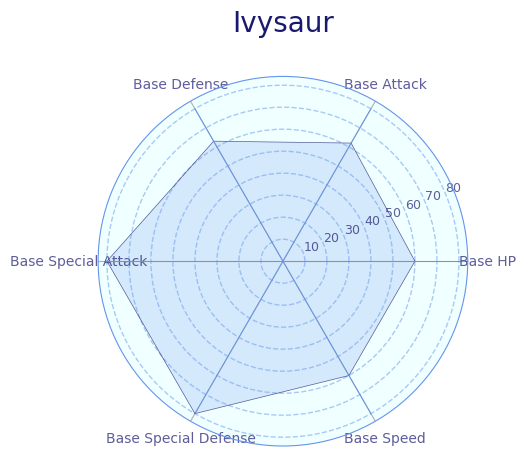

In [34]:
# Making radar chart for base stats
# Creating radar chart function 
def radar_chart(stats_df, poke_id):
    # Listing base stat categories
    categories = ['Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed']
    N = len(categories)

    # Putting the base stat categories into their own lists then starting back at the first one (to close the chart)
    values = stats_df.loc[poke_id, categories].values.flatten().tolist()
    values += values[:1]

    # Calculating each angle around the circle
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Plotting and formatting
    ax = plt.subplot(111, polar=True)

    # Setting bg color to azure
    ax.set_facecolor('azure')
    ax.plot(angles, values, linewidth = 0.5, linestyle = 'solid', color = 'midnightblue', alpha = 0.7)
    ax.fill(angles, values, 'cornflowerblue', alpha=0.2)
    ax.spines['polar'].set_color('cornflowerblue')

    # Formatting for grid lines
    ax.yaxis.grid(True, color='cornflowerblue', linestyle='--', linewidth=1, alpha=0.5)
    for angle in angles[:-1]:
        ax.plot([angle, angle], [0, max(values)], color='cornflowerblue', linewidth = 0.7)

    # Formatting for xticks and yticks
    plt.xticks(angles[:-1], categories, color='midnightblue', size=10, alpha = 0.7)
    plt.yticks(color = 'midnightblue',size = 9, alpha = 0.7)

    # Ensuring radar chart name is capitalized
    chart_name = stats_df.loc[poke_id, 'Pokemon Name'].capitalize()
    plt.title(chart_name, size=20, color='midnightblue', y=1.1)
    plt.show()

# Creating radar chart for second pokemon
radar_chart(pokemon_ev_df, 2)


In [35]:
# Checking pypokedex base stats to see if radar chart is correct
p = pypokedex.get(dex = 1)
p.base_stats

BaseStats(hp=45, attack=49, defense=49, sp_atk=65, sp_def=65, speed=45)

In [36]:
# user input radar chart
def user_radar_chart(stats_df):
    input = input("")

In [37]:
pokemon_df.to_csv('pokemon.csv', index = False, sep= ',')

## Pokemon Moves Data

In [76]:
# pokemon moves url for requests
# limit=937 refers to the count of moves stored in the api
url = "https://pokeapi.co/api/v2/move/?limit=937"

# printing moves response object to console
response = requests.get(url)

In [77]:
# objective: create dataframe that includes all pokemon moves and their attributes

# create empty list to create dataframe with
move_details = []

data = response.json()
moves = data['results']
poke_moves = []

# iterate through api to add moves and attributes into the empty list
for move in moves:
    move_url = move['url']
    move_response = requests.get(move_url)
    move_data = move_response.json()
    move_id = re.search(r'/(\d+)/$', move_url).group(1)
    move_name = move_data['name']

    if 'effect_entries' in move_data and len(move_data['effect_entries']) > 0:
        move_effect = move_data['effect_entries'][0]['effect']
    else:
        move_effect = "Effect data not available."
    
    power = move_data['power']
    accuracy = move_data['accuracy']
    pp = move_data['pp']
    move_type = move_data['type']['name']
    damage_class = move_data['damage_class']['name']
    for pokemon in move_data['learned_by_pokemon']:
        poke_move = {'Move ID': move_id, 'Poke ID': re.search(r'/(\d+)/$', pokemon['url']).group(1)} 
        poke_moves.append(poke_move)
        print(f'Poke Move: {poke_move}')

    move_details.append({
        'Move ID': move_id,
        'Move Name': move_name,
        'Move Effect': move_effect,
        'Power': power,
        'Accuracy': accuracy,
        'PP': pp,
        'Type': move_type,
        'Damage Class': damage_class

    })

# save into dataframe
moves_df = pd.DataFrame(move_details)
poke_moves_df = pd.DataFrame(poke_moves)

# convert numerical columns into integers to match erd diagram
moves_df['Power'] = moves_df['Power'].astype('Int64')
moves_df['Accuracy'] = moves_df['Accuracy'].astype('Int64')
moves_df['PP'] = moves_df['PP'].astype('Int64')
poke_moves_df[['Move ID', 'Poke ID']] = poke_moves_df[['Move ID', 'Poke ID']].astype('Int64')

# display dataframe
moves_df.head(5)

Poke Move: {'Move ID': '1', 'Poke ID': '35'}
Poke Move: {'Move ID': '1', 'Poke ID': '36'}
Poke Move: {'Move ID': '1', 'Poke ID': '39'}
Poke Move: {'Move ID': '1', 'Poke ID': '40'}
Poke Move: {'Move ID': '1', 'Poke ID': '60'}
Poke Move: {'Move ID': '1', 'Poke ID': '61'}
Poke Move: {'Move ID': '1', 'Poke ID': '62'}
Poke Move: {'Move ID': '1', 'Poke ID': '88'}
Poke Move: {'Move ID': '1', 'Poke ID': '89'}
Poke Move: {'Move ID': '1', 'Poke ID': '96'}
Poke Move: {'Move ID': '1', 'Poke ID': '97'}
Poke Move: {'Move ID': '1', 'Poke ID': '113'}
Poke Move: {'Move ID': '1', 'Poke ID': '115'}
Poke Move: {'Move ID': '1', 'Poke ID': '122'}
Poke Move: {'Move ID': '1', 'Poke ID': '124'}
Poke Move: {'Move ID': '1', 'Poke ID': '151'}
Poke Move: {'Move ID': '1', 'Poke ID': '173'}
Poke Move: {'Move ID': '1', 'Poke ID': '174'}
Poke Move: {'Move ID': '1', 'Poke ID': '175'}
Poke Move: {'Move ID': '1', 'Poke ID': '176'}
Poke Move: {'Move ID': '1', 'Poke ID': '186'}
Poke Move: {'Move ID': '1', 'Poke ID': '192'}

Move ID    Move Name                                        Move Effect  \
0       1        pound                           Inflicts regular damage.   
1       2  karate-chop  Inflicts regular damage.  User's critical hit ...   
2       3  double-slap  Inflicts regular damage.  Hits 2–5 times in on...   
3       4  comet-punch  Inflicts regular damage.  Hits 2–5 times in on...   
4       5   mega-punch                           Inflicts regular damage.   

   Power  Accuracy  PP      Type Damage Class  
0     40       100  35    normal     physical  
1     50       100  25  fighting     physical  
2     15        85  10    normal     physical  
3     18        85  15    normal     physical  
4     80        85  20    normal     physical

In [78]:
# verfify data types are correct
moves_df.dtypes

Move ID         object
Move Name       object
Move Effect     object
Power            Int64
Accuracy         Int64
PP               Int64
Type            object
Damage Class    object
dtype: object

In [80]:
# export dataframe into csv file
moves_df.to_csv('moves.csv', index = False) 
poke_moves_df.to_csv('pokeMoves.csv', index = False)

## Pokemon Types and Abilities

In [42]:
#Type table creation

#Specify URL
url = "https://pokeapi.co/api/v2/type/"

#Make request and store responses
types_data=requests.get(url).json()

#Extracting types
type_id=[]
type_name=[]
weak_to=[]
strong_against=[]

#loop to get type id and type name

for result in types_data['results']:
    id= re.search('([0-9]+)/$', result['url']).group(1)
    type_id.append(id)
    type_name.append(result['name'])

#loop to get weak to and strong against

for i in type_id:
    damage=requests.get(url+i).json()
    weak_to_names=[weak_type['name'] for weak_type in damage['damage_relations']['double_damage_from']]
    weak_to.append(",".join(weak_to_names))
    strong_against_names=[strong_type['name'] for strong_type in damage['damage_relations']['double_damage_to']]
    strong_against.append(",".join(strong_against_names))



In [43]:
#creating types dataframe 
types_df=pd.DataFrame({"Type Name": type_name,
                      "Weak To": weak_to,
                      "Strong Against": strong_against})

types_df

Type Name                            Weak To  \
0     normal                           fighting   
1   fighting               flying,psychic,fairy   
2     flying                  rock,electric,ice   
3     poison                     ground,psychic   
4     ground                    water,grass,ice   
5       rock  fighting,ground,steel,water,grass   
6        bug                   flying,rock,fire   
7      ghost                         ghost,dark   
8      steel               fighting,ground,fire   
9       fire                  ground,rock,water   
10     water                     grass,electric   
11     grass         flying,poison,bug,fire,ice   
12  electric                             ground   
13   psychic                     bug,ghost,dark   
14       ice           fighting,rock,steel,fire   
15    dragon                   ice,dragon,fairy   
16      dark                 fighting,bug,fairy   
17     fairy                       poison,steel   
18   stellar                                      
19   unknown                                      

                     Strong Against  
0                                    
1        normal,rock,steel,ice,dark  
2                fighting,bug,grass  
3                       grass,fairy  
4   poison,rock,steel,fire,electric  
5               flying,bug,fire,ice  
6                grass,psychic,dark  
7                     ghost,psychic  
8                    rock,ice,fairy  
9               bug,steel,grass,ice  
10                 ground,rock,fire  
11                ground,rock,water  
12                     flying,water  
13                  fighting,poison  
14       flying,ground,grass,dragon  
15                           dragon  
16                    ghost,psychic  
17             fighting,dragon,dark  
18                                   
19

In [58]:
#Ability table creation

#Specify URL
base_url2 = "https://pokeapi.co/api/v2/ability/"
ability_limit = '?limit=367'
url2 = base_url2 + ability_limit

#Make request and store responses
abilities_data_response = requests.get(url2)
abilities_data = abilities_data_response.json()

abilities_results = abilities_data['results']

#Extracting types
ability_id=[]
poke_id=[] #since this is a foreign key, can i just use the variable Ashley used in her code to call that info at the end to create the df?
ability_name=[]
effect=[]
short_effect=[]

#loop to get ability id and poke id from full list

for answer in abilities_results:
    ab_id=re.search(r'/([0-9]+)/$', answer['url']).group(1)
    ability_id.append(ab_id)
    ability_name.append(answer['name'])
    effect.append(None)  # Initialize with None
    short_effect.append(None)  # Initialize with None

#loop to get effect and short effect from individual links
for index, ability in enumerate(ability_id):
    initial = requests.get(base_url2 + ability).json()
    found_effect = False
    for effect_entry in initial.get('effect_entries', []):
        if effect_entry['language']['name'] == 'en':
            effect[index] = effect_entry.get('effect', None)
            short_effect[index] = effect_entry.get('short_effect', None)
            found_effect = True
            break  # Stop after finding en effect




In [59]:
# checking length of each array
print("ab id: " + str(len(ability_id)) + ", pokeid: " + str(len(poke_id)) + ", ab name: " + str(len(ability_name)) + ", effect: " + str(len(effect)) + ", sh effect: " + str(len(short_effect)))

ab id: 367, pokeid: 0, ab name: 367, effect: 367, sh effect: 367


In [60]:
#creating ability dataframe 
abilities_df=pd.DataFrame({'Ability ID': ability_id,
                      "Ability Name": ability_name,
                      "Effect": effect,
                      "Short Effect": short_effect})
abilities_df.fillna(value='None', inplace=True)

In [ ]:
abilities_df.head()

Ability ID  Ability Name                                             Effect  \
0          1        stench  This Pokémon's damaging moves have a 10% chanc...   
1          2       drizzle  The weather changes to rain when this Pokémon ...   
2          3   speed-boost  This Pokémon's Speed rises one stage after eac...   
3          4  battle-armor  Moves cannot score critical hits against this ...   
4          5        sturdy  When this Pokémon is at full HP, any hit that ...   

                                        Short Effect  
0  Has a 10% chance of making target Pokémon flin...  
1  Summons rain that lasts indefinitely upon ente...  
2            Raises Speed one stage after each turn.  
3                    Protects against critical hits.  
4  Prevents being KOed from full HP, leaving 1 HP...

In [61]:
#pokeAbility table creation

#URL
url3="https://pokeapi.co/api/v2/pokemon/"

#limited urls
limit='?limit=1302'
poke_url=url3 + limit

poke=requests.get(poke_url).json()

# #empty lists
poke_id=[]
pokemon_id=[]
abilities=[]


#loop through for poke id
for name in poke['results']:
    poke_data=re.search(r'/([0-9]+)/$', name['url']).group(1)
    poke_id.append(poke_data)



In [62]:
#loop through for each pokemon's ability
for id in poke_id:
    ability_data=requests.get(url3 + id).json()
    for ability_entry in ability_data['abilities']:
        pokemon_id.append(id)
        abilities.append(ability_entry['ability']['name'])

In [63]:
#pokeAbility dataframe
pokeability_df=pd.DataFrame({'Poke ID': pokemon_id,
                           'Abilities': abilities})

pokeability_df

Poke ID      Abilities
0          1       overgrow
1          1    chlorophyll
2          2       overgrow
3          2    chlorophyll
4          3       overgrow
...      ...            ...
2936   10273   water-absorb
2937   10274   mold-breaker
2938   10275         sturdy
2939   10276     tera-shell
2940   10277  teraform-zero

[2941 rows x 2 columns]

In [64]:
types_df.dtypes

types_df.to_csv("type.csv", index=False)

In [65]:

abilities_df['Ability ID']=abilities_df['Ability ID'].astype(int)

abilities_df.dtypes

abilities_df.to_csv("abilityEffects.csv", index=False)

In [66]:
pokeability_df['Poke ID']=pokeability_df['Poke ID'].astype(int)

pokeability_df.dtypes

# Removing duplicates
pokeability_df = pokeability_df.drop_duplicates(subset=['Poke ID', 'Abilities'])

pokeability_df.to_csv('pokeAbilities.csv', index=False)

## Pokemon Games

In [67]:
def get_id(url):
    return re.search('([0-9]+)/$', url).group(1)

In [68]:
# URL for GET requests to retrieve generation (games) data
url = "https://pokeapi.co/api/v2/generation/"

In [69]:
# Print the response object to the console
generations = requests.get(url).json()

In [70]:
# Retrieving data and converting it into JSON
generations = generations['results']
generations

[{'name': 'generation-i', 'url': 'https://pokeapi.co/api/v2/generation/1/'},
 {'name': 'generation-ii', 'url': 'https://pokeapi.co/api/v2/generation/2/'},
 {'name': 'generation-iii', 'url': 'https://pokeapi.co/api/v2/generation/3/'},
 {'name': 'generation-iv', 'url': 'https://pokeapi.co/api/v2/generation/4/'},
 {'name': 'generation-v', 'url': 'https://pokeapi.co/api/v2/generation/5/'},
 {'name': 'generation-vi', 'url': 'https://pokeapi.co/api/v2/generation/6/'},
 {'name': 'generation-vii', 'url': 'https://pokeapi.co/api/v2/generation/7/'},
 {'name': 'generation-viii', 'url': 'https://pokeapi.co/api/v2/generation/8/'},
 {'name': 'generation-ix', 'url': 'https://pokeapi.co/api/v2/generation/9/'}]

In [71]:
gen_url = generations[0]['url'].strip()


In [72]:
pokemon_species = requests.get(gen_url).json()['pokemon_species']
pokemans = []
for pokemon in pokemon_species:
    pokemans.append(get_id(pokemon['url']))

print(len(pokemans))

151


In [73]:
# Fill out the Games table by finding all Pokemon IDs
game_id = []
game_name = []
# loop through each generation
for generation in generations:
    gen_url = generation['url']
    gen_json = requests.get(gen_url).json()
    # to track which games a generation can be in, need to drill down into version group
    for version_group in gen_json['version_groups']:
        grp_url = version_group['url']
        grp_json = requests.get(grp_url).json()
        # keep track of each individual game
        for game in grp_json['versions']:
            game_id.append(get_id(game['url']))
            game_name.append(game['name'])

# create DataFrame to store pokemon games
game_df = pd.DataFrame({
    'game_id':game_id,
    'game_name':game_name
})

game_df['game_id'] = game_df['game_id'].astype(int)


In [74]:
# Fill out the pokeGame table by finding all Pokemon IDs
poke_id = []
game_id = []
# loop through each generation
for generation in generations:
    gen_url = generation['url']
    gen_json = requests.get(gen_url).json()
    available_in = []
    # to track which games a generation can be in, need to drill down into version group
    for version_group in gen_json['version_groups']:
        grp_url = version_group['url']
        grp_json = requests.get(grp_url).json()
        # keep track of each individual game
        for game in grp_json['versions']:
            available_in.append(get_id(game['url']))

    # for each pokemon in the pokemon_species list
    for pokemon in gen_json['pokemon_species']:
        id = get_id(pokemon['url'])
        # add an entry for each game that the pokemon could be in
        for game in available_in:
            poke_id.append(id)
            game_id.append(game)

# create DataFrame to store pokemon games
pokegame_df = pd.DataFrame({
    'poke_id':poke_id,
    'game_id':game_id
})

pokegame_df[['game_id', 'poke_id']] = pokegame_df[['game_id', 'poke_id']].astype(int)

In [75]:
game_df.to_csv('pokeGame.csv', index=False)
pokegame_df.to_csv('pokeGameIDS.csv', index=False)